# STAT 207 Project 01 - INSERT TITLE HERE

Andres Gomez

## 1. Introduction

Every single day of our lives we take the very well known risk of driving. Each time we roll out the cars there is a chance that there will be a collision. The dataset presented in this report includes 53,943 collision reports in Monroe County, Indiana. With this dataset we can answer intriguing questions such as what day of the week is statistically the safest to drive in or what hour of a particular day is the safest to drive in. This report is extremely beneficial for those living in Monroe County, Indiana and as well as those that find themselves living in counties similar to Monroe County, Indiana. The results of any analysis done with this dataset will help people be more aware of the risks in driving and perhaps can lead to safer roads as a result of the aweareness.
In this report we will explore if there is a relationship between hour and day of the week and the follow up question will be which day of the week and its corresponding hour occurs the most in the dataset? 

#Is there a relationship between collision type and if the result was fatal?


In [1]:
#Imports here
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("monroe_county_car_crash.csv")

In [3]:
print(f"Min year: {df['Year'].min()}")
print(f"Max year: {df['Year'].max()}")

Min year: 2003
Max year: 2015


## 2. Dataset Discussion

Immediately downloading from source and reading the data was not possible as the file was not using the right codec (UTF-8). To solve this, I opened the file in excel and saved it as a csv UTF-8 and once that was done I was able to read in the data.

Some limitations apart from that are present in this data are some of the categorical values do not have enough information for analysis. For example, in the "injury type" variable, no injury and unknown are grouped together. This limits future analysis as you cannot see if there is a relationship between unknown injury and date of report. Another limitation is the "Primary Factor" variable. This variable has a value of other that suggests there should be additional details in another variable but there isn't. The value other can mean anything apart from the set values that already exist and limits analysis as the primary factor in the crash is basically unknown.

#### Data
The unit of observation for this dataset is that each row represents a car crash incident in Monroe County, Indiana, USA.
I would consider this data a sample because of the fact that it includes data from 2003 to 2015 and not since cars were invented to present day. I would say that the data is representative of the population of interest given the amount of observations there are and that it is a sample.

According to the owner, the data was collect using a combination of official reports from law enforcement, insurance claims, and other reliable sources.

Car Crash Dataset (monroe_county_car_crash.csv)
This dataset was found on February 18, 2024 here: https://www.kaggle.com/datasets/jacksondivakarr/car-crash-dataset. It includes 11 variables and 53,943 observations.

#### Exploration
In this report I intend to explore Month, Day, and the hour variables. Each variable is pretty straightforward in that the value represents what the variable entails. As in, the month refers to what month of the year the accident occurred on, 1 being January and 12 being December. Day refers to what day of the week the accident occurred, 1 being Sunday and 7 being Saturday. Hour refers to what hour of the day the accident occurred on, 0000 (0.0) being midnight and 2359.0 being 11:59 PM.
Some limitation that I notice regarding these variables is that for the hour variable it seems like all the hours are rounded up or down which means that the hour is not completely accurate. Another limitaiton that I see is within that same variable is that there are missing values. Usually when a collision is reported it is pretty likely that the time will be recorded although if the source came from an insurance claim then perhaps the hour was lost as it isn't as important as the day or month. 

In [4]:
df.shape

(53943, 11)

In [5]:
df.head(6)

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625
5,2015,1,6,Weekday,1800.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,BURKS & WALNUT,39.126670,-86.531370


In [6]:
df['Hour'].unique()

array([   0., 1500., 2300.,  900., 1100., 1800., 1200., 1400., 1600.,
       1700., 1300.,  700., 2100., 2000., 1900.,  400., 1000.,  600.,
        800., 2200.,  100.,  200.,  300.,  500.,   nan])

In [7]:
df['Day'].unique()

array([5, 6, 7, 1, 2, 3, 4], dtype=int64)

In [8]:
df['Month'].unique()

array([ 1,  2,  3,  4,  5,  7,  8,  6,  9, 10, 11, 12], dtype=int64)

## 3. Dataset Cleaning

In [9]:
df.isna().sum()

Year                    0
Month                   0
Day                     0
Weekend?               68
Hour                  225
Collision Type          6
Injury Type             0
Primary Factor       1121
Reported_Location      35
Latitude               30
Longitude              30
dtype: int64

In [10]:
df.dtypes

Year                   int64
Month                  int64
Day                    int64
Weekend?              object
Hour                 float64
Collision Type        object
Injury Type           object
Primary Factor        object
Reported_Location     object
Latitude             float64
Longitude            float64
dtype: object

**Using the code above we see that Python has already detected missing values in the dataset. To make sure there are no other missing values in the dataset we can check to see if any variable has values that imply missing. We can focus on object variables as the int and float are correctly defined in accordance with the variable. Also worth noting how there are more missing values for reported location than latitude and longitude.**

In [11]:
df['Collision Type'].unique()

array(['2-Car', '1-Car', '3+ Cars', 'Pedestrian', 'Cyclist', 'Bus',
       'Moped/Motorcycle', nan], dtype=object)

In [12]:
df['Injury Type'].unique()

array(['No injury/unknown', 'Non-incapacitating', 'Incapacitating',
       'Fatal'], dtype=object)

In [13]:
df['Primary Factor'].unique()

array(['OTHER (DRIVER) - EXPLAIN IN NARRATIVE', 'FOLLOWING TOO CLOSELY',
       'DISREGARD SIGNAL/REG SIGN', 'FAILURE TO YIELD RIGHT OF WAY',
       'DRIVER DISTRACTED - EXPLAIN IN NARRATIVE',
       'ENGINE FAILURE OR DEFECTIVE', 'RAN OFF ROAD RIGHT',
       'UNSAFE BACKING', 'ROADWAY SURFACE CONDITION', nan,
       'SPEED TOO FAST FOR WEATHER CONDITIONS',
       'ANIMAL/OBJECT IN ROADWAY', 'PEDESTRIAN ACTION',
       'IMPROPER TURNING', 'UNSAFE LANE MOVEMENT', 'LEFT OF CENTER',
       'IMPROPER LANE USAGE', 'OVERCORRECTING/OVERSTEERING',
       'BRAKE FAILURE OR DEFECTIVE', 'UNSAFE SPEED',
       'DRIVER ASLEEP OR FATIGUED', 'VIEW OBSTRUCTED', 'DRIVER ILLNESS',
       'IMPROPER PASSING', 'OTHER (VEHICLE) - EXPLAIN IN NARRATIVE',
       'OTHER (ENVIRONMENTAL) - EXPLAIN IN NARR', 'WRONG WAY ON ONE WAY',
       'ACCELERATOR FAILURE OR DEFECTIVE', 'INSECURE/LEAKY LOAD',
       'CELL PHONE USAGE', 'TIRE FAILURE OR DEFECTIVE',
       'OTHER TELEMATICS IN USE', 'HEADLIGHT DEFECTIVE OR NOT O

In [14]:
len(df[df['Primary Factor'] == 'OTHER (DRIVER) - EXPLAIN IN NARRATIVE'])

6158

In [15]:
df['Reported_Location'].unique()

array(['1ST & FESS', '2ND & COLLEGE', 'BASSWOOD & BLOOMFIELD', ...,
       'RAPPLE & SR45', 'NINETH & NORTH', 'MONROW & THIRD ST'],
      dtype=object)

**There doesn't seem to be any missing values that are not detected by Python already. As mentioned before though, under the "Primary Factor" variable, the value of other can basically be seen as a missing value however it is not worth dropping as there are more than 6,000 observations of that value. It is also worth noting that there are multiple variations of 'Other' values recorded in the Primary Factor variable. It might be worth grouping them as one or communicating with the source to better explain the reason behind multiple variations of 'Other'.**

In [16]:
df.describe()

,Year,Month,Day,Hour,Latitude,Longitude
count,53943.000000,53943.000000,53943.000000,53718.000000,53913.000000,53913.000000
mean,2008.968059,6.662162,4.196912,1347.265349,35.582109,-78.619224
std,3.789760,3.514630,1.909440,531.654039,11.289883,24.957587
min,2003.000000,1.000000,1.000000,0.000000,0.000000,-88.959213
25%,2006.000000,4.000000,3.000000,1000.000000,39.142048,-86.551520
50%,2009.000000,7.000000,4.000000,1400.000000,39.164430,-86.530992
75%,2012.000000,10.000000,6.000000,1700.000000,39.173344,-86.508288
max,2015.000000,12.000000,7.000000,2300.000000,41.228665,86.596363


**Some concerning values to note is that the minimum latitude value is 0, which suggests a location along the equator, and the maximum longitude value is a positive value which suggests the other side of the world.**

In [17]:
df[ df.Latitude == 0]

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
58,2015,1,5,Weekday,1400.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,FOURTH & SR46W,0.0,0.0
63,2015,1,6,Weekday,800.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,100 BLK W TAPP & S WALNUT,0.0,0.0
74,2015,1,4,Weekday,800.0,1-Car,No injury/unknown,ROADWAY SURFACE CONDITION,SR37S,0.0,0.0
101,2015,1,3,Weekday,1800.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,RAMP 15 SB SR 37 TO SR 45 WEST & SR45W,0.0,0.0
121,2015,1,5,Weekday,1700.0,2-Car,No injury/unknown,DISREGARD SIGNAL/REG SIGN,COLLEGE MALL & EASTLAND PLAZA,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
53938,2003,10,6,Weekday,1700.0,2-Car,No injury/unknown,IMPROPER LANE USAGE,DUNN & WHITE LOT WEST,0.0,0.0
53939,2003,11,3,Weekday,800.0,1-Car,No injury/unknown,UNSAFE SPEED,RED OAK & SR446,0.0,0.0
53940,2003,12,5,Weekday,1200.0,2-Car,No injury/unknown,BRAKE FAILURE OR DEFECTIVE,2ND ST & WALNUT,0.0,0.0
53941,2003,12,1,Weekend,700.0,2-Car,No injury/unknown,UNSAFE BACKING,NINETH & NORTH,0.0,0.0


**There seems to be a lot of values of zero for latitude and longitude that should be counted as missing values**

In [18]:
df['Latitude'][df['Latitude'] == 0] = None
df['Longitude'][df['Longitude'] == 0] = None

C:\Users\Andres Gomez\AppData\Local\Temp\ipykernel_15468\3089980276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Latitude'][df['Latitude'] == 0] = None
C:\Users\Andres Gomez\AppData\Local\Temp\ipykernel_15468\3089980276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Longitude'][df['Longitude'] == 0] = None


In [19]:
df[df['Latitude'].isna() == True]

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
58,2015,1,5,Weekday,1400.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,FOURTH & SR46W,NaN,NaN
63,2015,1,6,Weekday,800.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,100 BLK W TAPP & S WALNUT,NaN,NaN
74,2015,1,4,Weekday,800.0,1-Car,No injury/unknown,ROADWAY SURFACE CONDITION,SR37S,NaN,NaN
101,2015,1,3,Weekday,1800.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,RAMP 15 SB SR 37 TO SR 45 WEST & SR45W,NaN,NaN
121,2015,1,5,Weekday,1700.0,2-Car,No injury/unknown,DISREGARD SIGNAL/REG SIGN,COLLEGE MALL & EASTLAND PLAZA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
53938,2003,10,6,Weekday,1700.0,2-Car,No injury/unknown,IMPROPER LANE USAGE,DUNN & WHITE LOT WEST,NaN,NaN
53939,2003,11,3,Weekday,800.0,1-Car,No injury/unknown,UNSAFE SPEED,RED OAK & SR446,NaN,NaN
53940,2003,12,5,Weekday,1200.0,2-Car,No injury/unknown,BRAKE FAILURE OR DEFECTIVE,2ND ST & WALNUT,NaN,NaN
53941,2003,12,1,Weekend,700.0,2-Car,No injury/unknown,UNSAFE BACKING,NINETH & NORTH,NaN,NaN


In [20]:
df.describe()

,Year,Month,Day,Hour,Latitude,Longitude
count,53943.000000,53943.000000,53943.000000,53718.000000,49005.000000,49005.000000
mean,2008.968059,6.662162,4.196912,1347.265349,39.145765,-86.493178
std,3.789760,3.514630,1.909440,531.654039,0.849984,2.051484
min,2003.000000,1.000000,1.000000,0.000000,1.000000,-88.959213
25%,2006.000000,4.000000,3.000000,1000.000000,39.153392,-86.556580
50%,2009.000000,7.000000,4.000000,1400.000000,39.164641,-86.533408
75%,2012.000000,10.000000,6.000000,1700.000000,39.175552,-86.517473
max,2015.000000,12.000000,7.000000,2300.000000,41.228665,86.596363


In [21]:
df[ df.Longitude >= 0]

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
4630,2014,9,2,Weekday,1400.0,3+ Cars,Incapacitating,FAILURE TO YIELD RIGHT OF WAY,BRIARGATE & SR46W,39.216728,86.596363
8257,2014,2,4,Weekday,700.0,1-Car,Non-incapacitating,SPEED TOO FAST FOR WEATHER CONDITIONS,K S ROLLOFF & OLD SR 37 RD,1.000000,1.000000
8258,2014,4,6,Weekday,800.0,2-Car,Non-incapacitating,LEFT OF CENTER,HINES & SR45S,1.000000,1.000000
8259,2014,4,6,Weekday,800.0,2-Car,Non-incapacitating,DRIVER DISTRACTED - EXPLAIN IN NARRATIVE,SR37N,1.000000,1.000000
8260,2014,9,5,Weekday,1100.0,1-Car,Incapacitating,RAN OFF ROAD RIGHT,GREEN CO LINE & SR45W,1.000000,1.000000
8261,2014,9,6,Weekday,1000.0,Bus,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,ENT TO 3205 W SR 45 & SR45W,1.000000,1.000000
12363,2013,1,5,Weekday,2000.0,Pedestrian,Non-incapacitating,SPEED TOO FAST FOR WEATHER CONDITIONS,COVENANTER DR & STRATUM,1.000000,1.000000
12364,2013,4,1,Weekend,1700.0,1-Car,Non-incapacitating,ANIMAL/OBJECT IN ROADWAY,BEAN BLOSSOM RD & CR4000N,1.000000,1.000000
12365,2013,10,6,Weekday,1400.0,Moped/Motorcycle,Incapacitating,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,KYLIE & S HARRELL RD,1.000000,1.000000
12366,2013,10,6,Weekday,1300.0,1-Car,Non-incapacitating,ANIMAL/OBJECT IN ROADWAY,SHRINER & SR37S,1.000000,1.000000


**Noticed there multiple values of one for latitude and longitude that should be counted as missing values**

In [22]:
df['Latitude'][df['Latitude'] == 1] = None
df['Longitude'][df['Longitude'] == 1] = None

C:\Users\Andres Gomez\AppData\Local\Temp\ipykernel_15468\3396054832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Latitude'][df['Latitude'] == 1] = None
C:\Users\Andres Gomez\AppData\Local\Temp\ipykernel_15468\3396054832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Longitude'][df['Longitude'] == 1] = None


In [23]:
df.describe()

,Year,Month,Day,Hour,Latitude,Longitude
count,53943.000000,53943.000000,53943.000000,53718.000000,48982.000000,48982.000000
mean,2008.968059,6.662162,4.196912,1347.265349,39.163677,-86.534262
std,3.789760,3.514630,1.909440,531.654039,0.198043,0.783768
min,2003.000000,1.000000,1.000000,0.000000,9.133739,-88.959213
25%,2006.000000,4.000000,3.000000,1000.000000,39.153414,-86.556592
50%,2009.000000,7.000000,4.000000,1400.000000,39.164655,-86.533408
75%,2012.000000,10.000000,6.000000,1700.000000,39.175552,-86.517517
max,2015.000000,12.000000,7.000000,2300.000000,41.228665,86.596363


In [24]:
df.isna().sum()

Year                    0
Month                   0
Day                     0
Weekend?               68
Hour                  225
Collision Type          6
Injury Type             0
Primary Factor       1121
Reported_Location      35
Latitude             4961
Longitude            4961
dtype: int64

In [32]:
df.to_csv('cleaned_monroe_crash_data.csv', index=False)

## 4. Summarizing Data

In [25]:
df_focus = df[['Day', 'Hour']]
df_focus

,Day,Hour
0,5,0.0
1,6,1500.0
2,6,2300.0
3,7,900.0
4,7,1100.0
...,...,...
53938,6,1700.0
53939,3,800.0
53940,5,1200.0
53941,1,700.0


In [26]:
df_focus.isna().sum()

Day       0
Hour    225
dtype: int64

**Can drop missing values as it is not a significant portion of our dataset**

In [27]:
df_focus.dropna()

,Day,Hour
0,5,0.0
1,6,1500.0
2,6,2300.0
3,7,900.0
4,7,1100.0
...,...,...
53938,6,1700.0
53939,3,800.0
53940,5,1200.0
53941,1,700.0


<Axes: xlabel='Day', ylabel='Hour'>

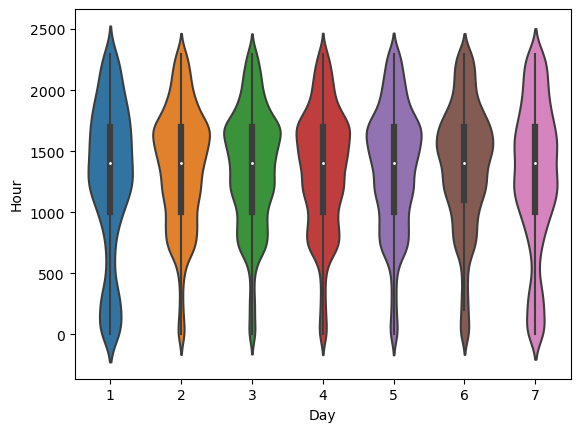

In [28]:
sns.violinplot(x = 'Day', y = 'Hour', data = df_focus)

In [29]:
pd.crosstab(df_focus['Hour'], df_focus['Day'], normalize = True)

Day,1,2,3,4,5,6,7
Hour,,,,,,,
0.0,0.004244,0.001955,0.002010,0.002234,0.002290,0.003034,0.004989
100.0,0.003407,0.001117,0.001173,0.001471,0.001545,0.002364,0.003835
200.0,0.003276,0.000856,0.001322,0.001284,0.001210,0.001973,0.003407
300.0,0.003444,0.000652,0.001266,0.001080,0.001154,0.001936,0.003853
400.0,0.001787,0.000670,0.000745,0.000987,0.001080,0.001396,0.002234
500.0,0.001117,0.001359,0.001266,0.001303,0.001378,0.001787,0.001359
600.0,0.001284,0.002401,0.002401,0.002439,0.002737,0.002178,0.001564
700.0,0.001359,0.006460,0.007167,0.007465,0.007148,0.005883,0.002327
800.0,0.001601,0.006758,0.007577,0.008023,0.007074,0.007074,0.003723


## Any other type of analysis/question you want to explore with this dataset.

<u>Why?</u>: Sometimes undergraduate students will put the research projects that they did for their classes on their resumes when applying for graduate schools, internships, and jobs. If you're interested in showcasing cool analyses to write on your resume, this section could help with that. **(This section is not worth any points though).**

## 5. Conclusion

Looking at the distribution in the violin plots, we see that the general shape is more or less the same for all days of the week. There does not seem to be a strong relationship between day of the week and hour of the day. Although it is worth to note that the median is around 1430 so we can say that typically collisions occur most often around that time. Also from the plot and the crosstab, we see that there is a higher probability of a collision when it is around 1600. Limitations were encountered with this dataset such as reading it and some categorical values that were inconsistent or needed further details. Through it all, further analysis can be done to determine other potential relationships and even a prediction model of number of collisions in upcoming years. 